1.浮现代码

In [ ]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.images.shape

(55000, 784)

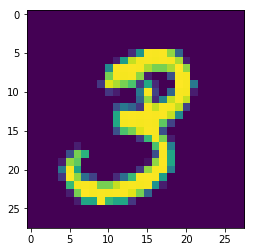

In [4]:
plt.imshow(Image.fromarray((mnist.train.images[1] * 255).astype(np.uint8).reshape([28,28])))

In [5]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [6]:
#获得批量样本
batch_images,batch_labels = mnist.train.next_batch(32)

In [7]:
batch_images.shape

(32, 784)

In [8]:
batch_labels.shape

(32, 10)

In [23]:
with tf.Graph().as_default() as g:
    
    #输入层
    inputs = tf.placeholder(shape=[None,784],dtype=tf.float32)
    labels = tf.placeholder(shape=[None,10],dtype=tf.float32)
    
    #8.改进
   
    #创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    # 创建输出层10个神经元参数
    out_weight = tf.Variable(tf.random_normal([128, 10]))
    #偏置值一般用0初始化
    out_bias = tf.Variable(tf.zeros([10, ]))
     #6.可以使用正态分布、均匀分布初始化参数
    #out_weight = tf.Variable(tf.random_normal_initializer([784,10]))
    #out_bias = tf.Variable(tf.random_normal_initializer([10,]))
    
    # 输出层前向传播
    out_z = tf.matmul(hidden_output,out_weight) + out_bias  # out_z=logits
    output = tf.nn.softmax(out_z)      # [None,10]
    #5.可以使用不同的激活函数，例如sigmoid函数
    #logits = 1 / (1+np.exp(inputs))
    
    loss = tf.reduce_mean(
        - tf.reduce_sum(labels * tf.log(output + 1e-17),axis=1))
    
    acc = tf.reduce_mean(                                                #求均值#转换为float tf.cast
        tf.cast(tf.equal(tf.argmax(output,axis=1),tf.argmax(labels,axis=1)),tf.float32)) #返回相等的数量tf.equal  
    
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01) #优化器
    #4.使用不同大小的学习率进行实验
    #optim = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optim.minimize(loss)

In [29]:
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())    #初始化变量
    #使用不同大小的批次进行实验
    for i in range(10000):
        batch_images,batch_labels = \
        mnist.train.next_batch(32)
        
        res_loss,_ = sess.run([loss,train_op],
                              feed_dict={inputs: batch_images,
                                         labels: batch_labels
                                        })
        if i % 500 == 0:
            accs = []
            for j in range(10000 // 32):
            #for j in range(10000 // 16):    
                batch_images,batch_labels = \
                     mnist.test.next_batch(32)
                res_acc = sess.run(
                    acc,
                    feed_dict={inputs: batch_images,
                               labels: batch_labels
                              })
                accs.append(res_acc)
            accs = np.mean(accs)
            
            print('i %5d, loss %2.4f, acc %.4f' % (i, res_loss, accs))

i     0, loss 27.8602, acc 0.1256
i   500, loss 19.2614, acc 0.5628
i  1000, loss 14.2166, acc 0.6388
i  1500, loss 9.2098, acc 0.7219
i  2000, loss 5.9280, acc 0.7520
i  2500, loss 6.8402, acc 0.7953
i  3000, loss 6.3750, acc 0.8442
i  3500, loss 1.8977, acc 0.8548
i  4000, loss 3.8901, acc 0.8661
i  4500, loss 4.9397, acc 0.8669
i  5000, loss 5.0841, acc 0.8743
i  5500, loss 1.5298, acc 0.8806
i  6000, loss 6.0664, acc 0.8850
i  6500, loss 4.2183, acc 0.8840
i  7000, loss 1.9783, acc 0.8928
i  7500, loss 1.7926, acc 0.8938
i  8000, loss 2.2860, acc 0.8929
i  8500, loss 0.8165, acc 0.8984
i  9000, loss 3.5780, acc 0.8972
i  9500, loss 1.6916, acc 0.8993


7.思考如何改进模型以使得模型性能增强
增大数据集，给模型提供更多的数据，剔除没有效用的数据；人工分析误差；分析模型的偏差和方差；

1-6/8见代码注释